## Settings for Matroos database

The matroos database is the operational forecasting database of Rijkswaterstaat. Several times a day new forecasts are made with several hydrodynamic (tides and surge) models and wave models. 
The most important models in this context are:
- dd zuno-v4 - this is the current model for the southern North-Sea (available 21-april-2020 until now)
- harmonie - the weather model currently used at KNMI

![dd zunov4](https://matroos.deltares.nl/direct/get_matroos.php?source=dcsmv6_zunov4_zuno_kf_harmonie&color=VELUV_ABS&contour=&anal=&from=202305050900&z=0&xmin=-6&xmax=11.6&ymin=49.2&ymax=57.2&smin=0.000&smax=1&size=640&smincolor=blue&smaxcolor=yellow&coords=WGS84&scontour=&vx=25&vy=25&vecsize=1&xn=1&yn=1&vector=&format=png "Zunv4 model")


In [24]:
# extenal modules
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import getpass


In [40]:
# Settings for Matroos
# use:
# https://matroos.rws.nl if you have an account at that server or
# https://matroos.deltares.nl/ if you have a vpn connection to Deltares or are working in a Deltares office 
database_url = "https://matroos.rws.nl"
username = getpass.getpass(prompt="Username:")
password = getpass.getpass(prompt="Password:") #Do not save the password to a public location, such as at github
water_model = "dcsmv6_zunov4_zuno_kf_harmonie"
print(f'username={username},password={password}')

username=svsd,password=n0v2006


In [41]:
# Check the connection to the server
# If you get a data-time for today then everything is working
# There is no need to re-run this cell all the time, since it's just a check

# Download url with get parameters 
url="https://matroos.rws.nl/direct/get_anal_times.php?database=maps2d&loc=&source=dcsmv6_zunov4_zuno_kf_harmonie&unit=&tstart=&tstop=&timezone=&most_recent=5"

# send request to server
r = requests.get(url, auth=(username, password))
print(f'response = {r}  [200 is good]\n')
temp_file = 'temporary_file_with_times.csv'
open(temp_file, 'wb').write(r.content)
# download data into a pandas dataframe
df = pd.read_csv(temp_file, sep=';', index_col=0, parse_dates=True, dayfirst=True)
os.remove(temp_file)
df

response = <Response [200]>  [200 is good]



""
202305031500


In [42]:
# Settings for collecting the data
#initial and final date and time in timezone UTCC (NL winter time is UTC+1, NL summer time is UTC+2)
tstart = "2022-10-01 00:00:00" # start of the period of interest (year-month-day hour:minute:second)
tstop  = "2022-10-02 00:00:00" # end of the period of interest
longitude_min = 4.0 # minimum longitude (most western point in degrees)
longitude_max = 6.0 # maximum longitude (most eastern point in degrees)
latitude_min = 53.0 # minimum latitude (most southern point in degrees)
latitude_max = 54.0 # maximum latitude (most northern point in degrees)
cellx = 100 # number of data points in x-direction (larger will give more detail, but also result in larger files)
celly = 100 # number of data points in y-direction ( you should start carefully with 100, and use an image to check if the data has sufficient detail; see image below)
# The data has the form of a cube with directions x, y and time. The size of the cube is (cellx,celly,ntime) and proportional in filesize to the prduct of these three numbers. For larger values the database will become slower and beyond a certain size it will not respond anymore.


# no need to change anything below this line
fieldoutput="VELU,VELV,VELUV_ABS,SEP" #download these variables (velocity and waterlevel)
stridetime=1 # collect all times or skip some (1 means all times, 2 means every second time, 3 means every third time, etc.)

In [44]:
# Download the data from the server

#if folder data does not exist, create it
if not os.path.exists("data"):
    os.makedirs("data")

#reformat time from for example "2022-10-01 00:00:00" to "202210010000"
tstart_str = tstart.replace("-","").replace(" ","").replace(":","")
tstop_str = tstop.replace("-","").replace(" ","").replace(":","")

#compose url
url = database_url + "/direct/get_matroos.php?source=" + water_model + "&anal=000000000000&z=0&xmin=" + str(longitude_min) + "&xmax=" + str(longitude_max) + "&ymin=" + str(latitude_min) + "&ymax=" + str(latitude_max) + "&coords=WGS84&xmin_abs=" + str(longitude_min) + "&xmax_abs=" + str(longitude_max) + "&ymin_abs=" + str(latitude_min) + "&ymax_abs=" + str(latitude_max) + "&color=" + fieldoutput + "&interpolate=size&now=" + tstop_str + "&to=" + tstop_str + "&from=" + tstart_str + "&outputformat=nc&stridex=&stridey=&stridetime=" + str(stridetime) + "&xn=" + str(cellx) + "&yn=" + str(celly) + "&celly=" + str(celly) + "&cellx=" + str(cellx) + "&fieldoutput=" + fieldoutput + "&format=nc"
print(f'url={url}\n')
# send request to server
print("Be patient, this can take a while")
r = requests.get(url, auth=(username, password))
print(f'response = {r}  [200 is good]\n')
# save data to file
filename = "data/" + water_model + "_" + tstart_str + "_" + tstop_str + ".nc"
f=open(filename, "wb")
f.write(r.content)
f.close()


url=https://matroos.rws.nl/direct/get_matroos.php?source=dcsmv6_zunov4_zuno_kf_harmonie&anal=000000000000&z=0&xmin=4.0&xmax=6.0&ymin=53.0&ymax=54.0&coords=WGS84&xmin_abs=4.0&xmax_abs=6.0&ymin_abs=53.0&ymax_abs=54.0&color=VELU,VELV,VELUV_ABS,SEP&interpolate=size&now=20221002000000&to=20221002000000&from=20221001000000&outputformat=nc&stridex=&stridey=&stridetime=1&xn=100&yn=100&celly=100&cellx=100&fieldoutput=VELU,VELV,VELUV_ABS,SEP&format=nc

Be patient, this can take a while
response = <Response [200]>  [200 is good]



<xarray.Dataset>
Dimensions:    (y: 100, time: 145, x: 100)
Coordinates:
  * y          (y) float64 53.0 53.01 53.02 53.03 ... 53.97 53.98 53.99 54.0
  * time       (time) datetime64[ns] 2022-10-01 ... 2022-10-02
  * x          (x) float64 4.0 4.02 4.04 4.061 4.081 ... 5.939 5.96 5.98 6.0
Data variables:
    VELV       (time, y, x) float32 ...
    VELU       (time, y, x) float32 ...
    VELUV_ABS  (time, y, x) float32 ...
    SEP        (time, y, x) float32 ...
Attributes: (12/24)
    source:                         dcsmv6zunov4_harmonie
    system:                         nz
    fews_build_number:              100693
    date_created:                   2022-10-01 07:20:07 GMT
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    coordinate_system:              WGS84
    ...                             ...
    grid_type:                      REGULAR
    issue_time:                     2022-10-01 07:20:07 GMT
    analysis_time:                  2022-10-01 03:00:00 GMT
    title:                          NetCDF created with command <./curv2rect....
    modelcodeid_version:            simona2019.1
    institution:                    Rijkswaterstaat-HMC

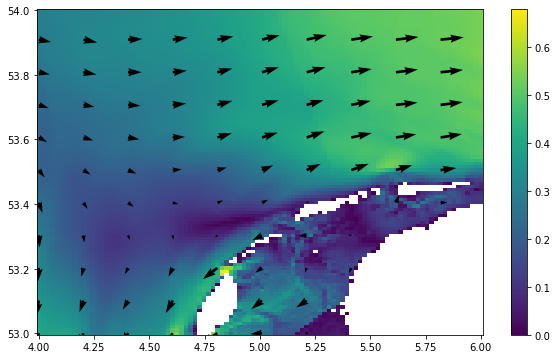

In [21]:
# open data file with xarray
ds = xr.open_dataset(filename)
x=ds['x'][:]
y=ds['y'][:]
uv_abs=ds['VELUV_ABS'][-1,:,:]
fig, ax = plt.subplots(figsize=(10, 6))
p1=ax.pcolormesh(x,y,uv_abs) # plot last time step of velocity magnitude
fig.colorbar(p1)
stide=10 # plot every stide-th arrow
ax.quiver(x[::stide],y[::stide],ds['VELU'][-1,::stide,::stide],ds['VELV'][-1,::stide,::stide],scale=10) 

ds 

In [12]:
ds["x"]

<xarray.DataArray 'x' (x: 100)>
array([4.      , 4.020202, 4.040404, 4.060606, 4.080808, 4.10101 , 4.121212,
       4.141414, 4.161616, 4.181818, 4.20202 , 4.222222, 4.242424, 4.262626,
       4.282828, 4.30303 , 4.323232, 4.343434, 4.363636, 4.383838, 4.40404 ,
       4.424242, 4.444444, 4.464646, 4.484848, 4.505051, 4.525253, 4.545455,
       4.565657, 4.585859, 4.606061, 4.626263, 4.646465, 4.666667, 4.686869,
       4.707071, 4.727273, 4.747475, 4.767677, 4.787879, 4.808081, 4.828283,
       4.848485, 4.868687, 4.888889, 4.909091, 4.929293, 4.949495, 4.969697,
       4.989899, 5.010101, 5.030303, 5.050505, 5.070707, 5.090909, 5.111111,
       5.131313, 5.151515, 5.171717, 5.191919, 5.212121, 5.232323, 5.252525,
       5.272727, 5.292929, 5.313131, 5.333333, 5.353535, 5.373737, 5.393939,
       5.414141, 5.434343, 5.454545, 5.474747, 5.494949, 5.515152, 5.535354,
       5.555556, 5.575758, 5.59596 , 5.616162, 5.636364, 5.656566, 5.676768,
       5.69697 , 5.717172, 5.737374, 5.757576, 5.777778, 5.79798 , 5.818182,
       5.838384, 5.858586, 5.878788, 5.89899 , 5.919192, 5.939394, 5.959596,
       5.979798, 6.      ])
Coordinates:
  * x        (x) float64 4.0 4.02 4.04 4.061 4.081 ... 5.919 5.939 5.96 5.98 6.0
Attributes:
    AXIS:           X
    standard_name:  longitude
    point_spacing:  even
    modulo:          
    units:          degrees_east

## Releasing particles in the field

In [ ]:
# settings for the particle tracking

In [ ]:
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import math
from datetime import timedelta
from operator import attrgetter